# Differential Equations Practicum
The purpose of this activity is to implement and/or understand the principles of numerical methods in differential equations.

Variant 24.

Original Equation:

$$
y' = xy^2-3xy,\:y(0)=2\\
\dfrac{y'}{y^2}=x-\dfrac{3x}{y}\\
z=1/y,\:dz=-\dfrac{dy}{y^2}\\
-z'=x(1-3z)\\
\dfrac{z'}{3z-1}=x\\
\dfrac{\ln{(3z-1)}}{3}=\dfrac{x^2}{2}+C_1\\
-1+3z=C_2e^{\dfrac{3x^2}{2}}\\
3\dfrac{1}{y}=C_2e^{\frac{3x^2}{2}}+1\\
y=\dfrac{3}{1+C_2e^{\frac{3x^2}{2}}}\\
For\:y(0)=2\:=>\:2=\dfrac{3}{C_2+1}\:=>\:C_2=\frac{1}{2}
$$

Exact Solution:

$$
y=\frac{6}{2+e^{\frac{3x^2}{2}}}
$$




In [ ]:
import matplotlib.pyplot as plt
    from math import exp

In [2]:
def my_func(x, y):
    return x * y * y - 3 * x * y

In [3]:
def exact_func(x,y):
    return 6/(exp(3*x*x/2)+2)

In [4]:
def euler(func, x0, y0, X, N_steps):
    x = [float(x0)]
    y = [float(y0)]
    h = (X - x0) / N_steps
    for i in range(N_steps):
        x.append(x[i] + h)
        y.append(y[i] + h * func(x[i], y[i]))
    return x, y

In [5]:
def improved_euler(func, x0, y0, X, N_steps):
    x = [x0]
    y = [y0]
    h = (X - x0) / N_steps
    for i in range(N_steps):
        x.append(x[i] + h)
        m1 = func(x[i], y[i])
        m2 = func(x[i + 1], y[i] + h * m1)
        y.append(y[i] + h * (m1 + m2) / 2)
    return x, y

In [6]:
def runge_kutta(func, x0, y0, X, N_steps):
    x = [x0]
    y = [y0]
    h = (X - x0) / N_steps
    for i in range(N_steps):
        x.append(x[i] + h)
        k1 = h * func(x[i], y[i])
        k2 = h * func(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * func(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * func(x[i] + h, y[i] + k3)
        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return x, y

/usr/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


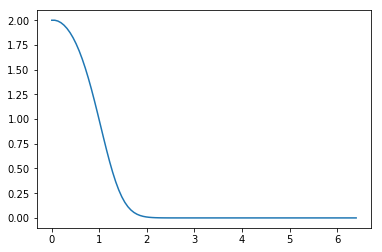

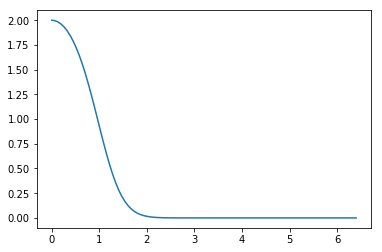

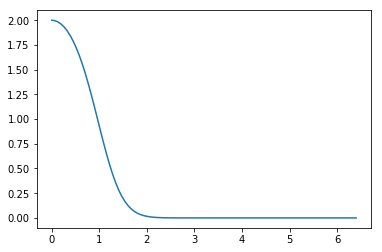

In [7]:
x0 = 0
y0 = 2
X = 6.4
N_steps = 100
(x, y) = euler(my_func, x0, y0, X, N_steps)
fig, ax = plt.subplots()
ax.plot(x, y)
fig.show()
(x, y) = improved_euler(my_func, x0, y0, X, N_steps)
fig2, ax2 = plt.subplots()
ax2.plot(x, y)
fig2.show()
(x, y) = improved_euler(my_func, x0, y0, X, N_steps)
fig3, ax3 = plt.subplots()
ax3.plot(x, y)
fig3.show()